# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: XX__

__Nombres de los estudiantes: Enrique Queipo de Llano y Alejandro Paz Olalla__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

RANDOM_STATE = 333

df = pd.read_csv('lower_back_pain_dataset2.csv', index_col = 0)
df.head()

pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
pelvic_incidence                                                     
63.027817           22.552586              39.609117     40.475232   
39.056951           10.060991              25.015378     28.995960   
68.832021           22.218482              50.092194     46.613539   
69.297008           24.652878              44.311238     44.644130   
49.712859            9.652075              28.317406     40.060784   

                  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
pelvic_incidence                                                          
63.027817             98.672917                 -0.254400      0.744503   
39.056951            114.405425                  4.564259      0.415186   
68.832021            105.985135                 -3.530317      0.474889   
69.297008            101.868495                 11.211523      0.369345   
49.712859            108.168725                  7.918501      0.543360   

                  Direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence                                                             
63.027817             12.5661         14.5386       15.30468    -28.658501   
39.056951             12.8874         17.5323       16.78486    -25.530607   
68.832021             26.8343         17.4861       16.65897    -29.031888   
69.297008             23.5603         12.7074       11.42447    -30.470246   
49.712859             35.4940         15.9546        8.87237    -16.378376   

                  scoliosis_slope Class_att  
pelvic_incidence                             
63.027817                 43.5123  Abnormal  
39.056951                 16.1102  Abnormal  
68.832021                 19.2221  Abnormal  
69.297008                 18.8329  Abnormal  
49.712859                 24.9171  Abnormal

In [2]:
#We reset the index
df.reset_index(inplace=True)
df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope Class_att  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [4]:
df.isna().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Class_att                   0
dtype: int64

No hay valores nulos, por lo que nos ahorramos el tratamiento con ellos

In [5]:
df.describe().transpose()

count        mean        std        min         25%  \
pelvic_incidence          310.0   60.496653  17.236520  26.147921   46.430294   
pelvic_tilt               310.0   17.542822  10.008330  -6.554948   10.667069   
lumbar_lordosis_angle     310.0   51.930930  18.554064  14.000000   37.000000   
sacral_slope              310.0   42.953831  13.423102  13.366931   33.347122   
pelvic_radius             310.0  117.920655  13.317377  70.082575  110.709196   
degree_spondylolisthesis  310.0   26.296694  37.559027 -11.058179    1.603727   
pelvic_slope              310.0    0.472979   0.285787   0.003220    0.224367   
Direct_tilt               310.0   21.321526   8.639423   7.027000   13.054400   
thoracic_slope            310.0   13.064511   3.399713   7.037800   10.417800   
cervical_tilt             310.0   11.933317   2.893265   7.030600    9.541140   
sacrum_angle              310.0  -14.053139  12.225582 -35.287375  -24.289522   
scoliosis_slope           310.0   25.645981  10.450558   7.007900   17.189075   

                                 50%         75%         max  
pelvic_incidence           58.691038   72.877696  129.834041  
pelvic_tilt                16.357689   22.120395   49.431864  
lumbar_lordosis_angle      49.562398   63.000000  125.742385  
sacral_slope               42.404912   52.695888  121.429566  
pelvic_radius             118.268178  125.467674  163.071041  
degree_spondylolisthesis   11.767934   41.287352  418.543082  
pelvic_slope                0.475989    0.704846    0.998827  
Direct_tilt                21.907150   28.954075   36.743900  
thoracic_slope             12.938450   15.889525   19.324000  
cervical_tilt              11.953835   14.371810   16.821080  
sacrum_angle              -14.622856   -3.497094    6.972071  
scoliosis_slope            24.931950   33.979600   44.341200

In [6]:
df.rename(columns={'Class_att':'class'},inplace=True)
df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope     class  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases? 

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

In [7]:
df.groupby('class').mean()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
class                                                                          
Abnormal         64.692562    19.791111              55.925370      44.90145   
Normal           51.685244    12.821414              43.542605      38.86383   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
class                                                                          
Abnormal     115.077713                 37.777705      0.483979    21.085875   
Normal       123.890834                  2.186572      0.449880    21.816394   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
class                                                                   
Abnormal       12.948913      12.132737    -13.826677        25.146915  
Normal         13.307268      11.514534    -14.528712        26.694019

In [8]:
df.groupby('class').median()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
class                                                                          
Abnormal         65.274888    18.798899              56.150000     44.639597   
Normal           50.123115    13.482435              42.638923     37.059694   

          pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
class                                                                          
Abnormal     115.650323                 31.946516      0.501280      21.7506   
Normal       123.874328                  1.152710      0.418732      22.4146   

          thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
class                                                                   
Abnormal        12.77005      11.973735    -14.892070         24.50940  
Normal          13.40975      11.330750    -13.974694         27.72795

La media correspondiente a Abnormal para degree_spondylolisthesis es mayor que la correspondiente mediana,esto puede ser principalmente porque la variable degree_spondylolisthesis sesgada hacia la derecha. Puede ser también por los outliers.

<AxesSubplot:xlabel='degree_spondylolisthesis', ylabel='Count'>

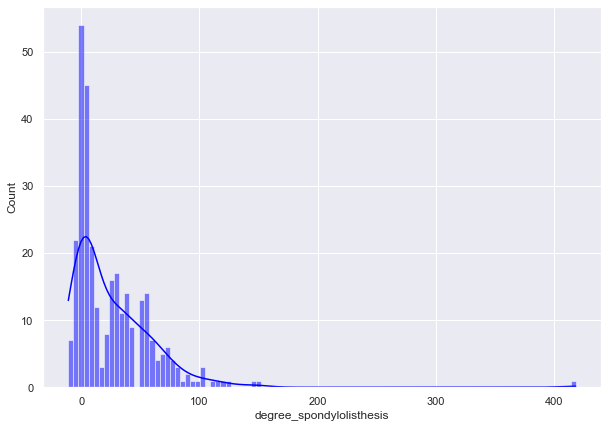

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(df['degree_spondylolisthesis'],bins=100, kde=True, color="blue")

In [50]:
df.skew(numeric_only=True)

pelvic_incidence            0.520440
pelvic_tilt                 0.676553
lumbar_lordosis_angle       0.599451
sacral_slope                0.792577
pelvic_radius              -0.176835
degree_spondylolisthesis    4.317954
pelvic_slope                0.016231
Direct_tilt                 0.010796
thoracic_slope              0.023046
cervical_tilt               0.015017
sacrum_angle               -0.015360
scoliosis_slope             0.064216
dtype: float64

En efecto, comprobamos un positive skewness de la variable degree_spondylolisthesis

### Visualizamos el número de casos normales y anormales

En el dataset, contamos con el doble de casos anormales que normales.
Vamos a mantener la codificación binaria de la clase para calcular correlaciones

Abnormal    210
Normal      100
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

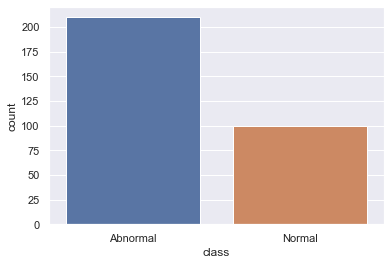

In [11]:
print(df['class'].value_counts())
sns.countplot(x = "class", data = df)

Sí que están un poco desbalanceadas las clases. Sin embargo, dado que la clase `Normal` representa más de un 20% de los datos, no requeriremos un tratamiento especial, aunque habrá que tener esto en cuenta de cara a los resultados. Será importante medir el funcionamiento del modelo _en cada clase_.

### Correlación entre variables

El coeficiente de correlación es una medida numérica de la relación estadística entre dos variables. Visualicemos a continuación el coeficiente de correlación de pearson entre las variables

In [12]:
df_coded = df.copy()
df_coded['class'] = df_coded['class'].astype('category').cat.codes
df_coded.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  class  
0         14.5386       15.30468    -28.658501          43.5123      0  
1         17.5323       16.78486    -25.530607          16.1102      0  
2         17.4861       16.65897    -29.031888          19.2221      0  
3         12.7074       11.42447    -30.470246          18.8329      0  
4         15.9546        8.87237    -16.378376          24.9171      0

In [13]:
df_coded.corr()['class']

pelvic_incidence           -0.353336
pelvic_tilt                -0.326063
lumbar_lordosis_angle      -0.312484
sacral_slope               -0.210602
pelvic_radius               0.309857
degree_spondylolisthesis   -0.443687
pelvic_slope               -0.055865
Direct_tilt                 0.039591
thoracic_slope              0.049354
cervical_tilt              -0.100044
sacrum_angle               -0.026887
scoliosis_slope             0.069315
class                       1.000000
Name: class, dtype: float64

Podemos observar que la variable `degree_spondylolithesis` es la que más relación tiene con la varaible objetivo `class`. Esto lo veremos también en las dos siguientes gráficas

<AxesSubplot:>

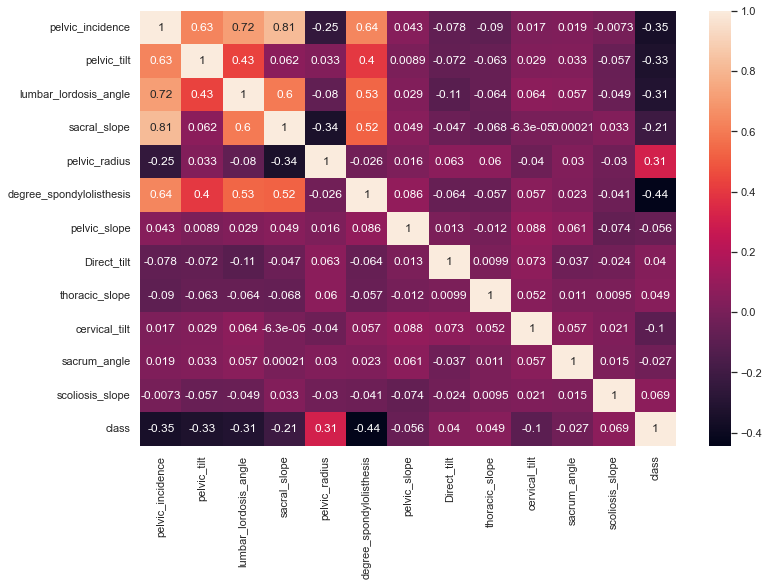

In [14]:
plt.subplots(figsize=(12,8))
sns.heatmap(df_coded.corr(), annot=True)

Valores cercanos a +-1 indican una alta correlación entre las variables predictoras.
Podemos observar que hay multi-correlación en los datos.

Podemos ver, por ejemplo, que pelvic_incidence está altamente relacionada con pelvic_tilt, lumbar_lordosis_angle, sacral_slope and degree_spondylolisthesis
    
Vamos a hacer el gráfico por pares.

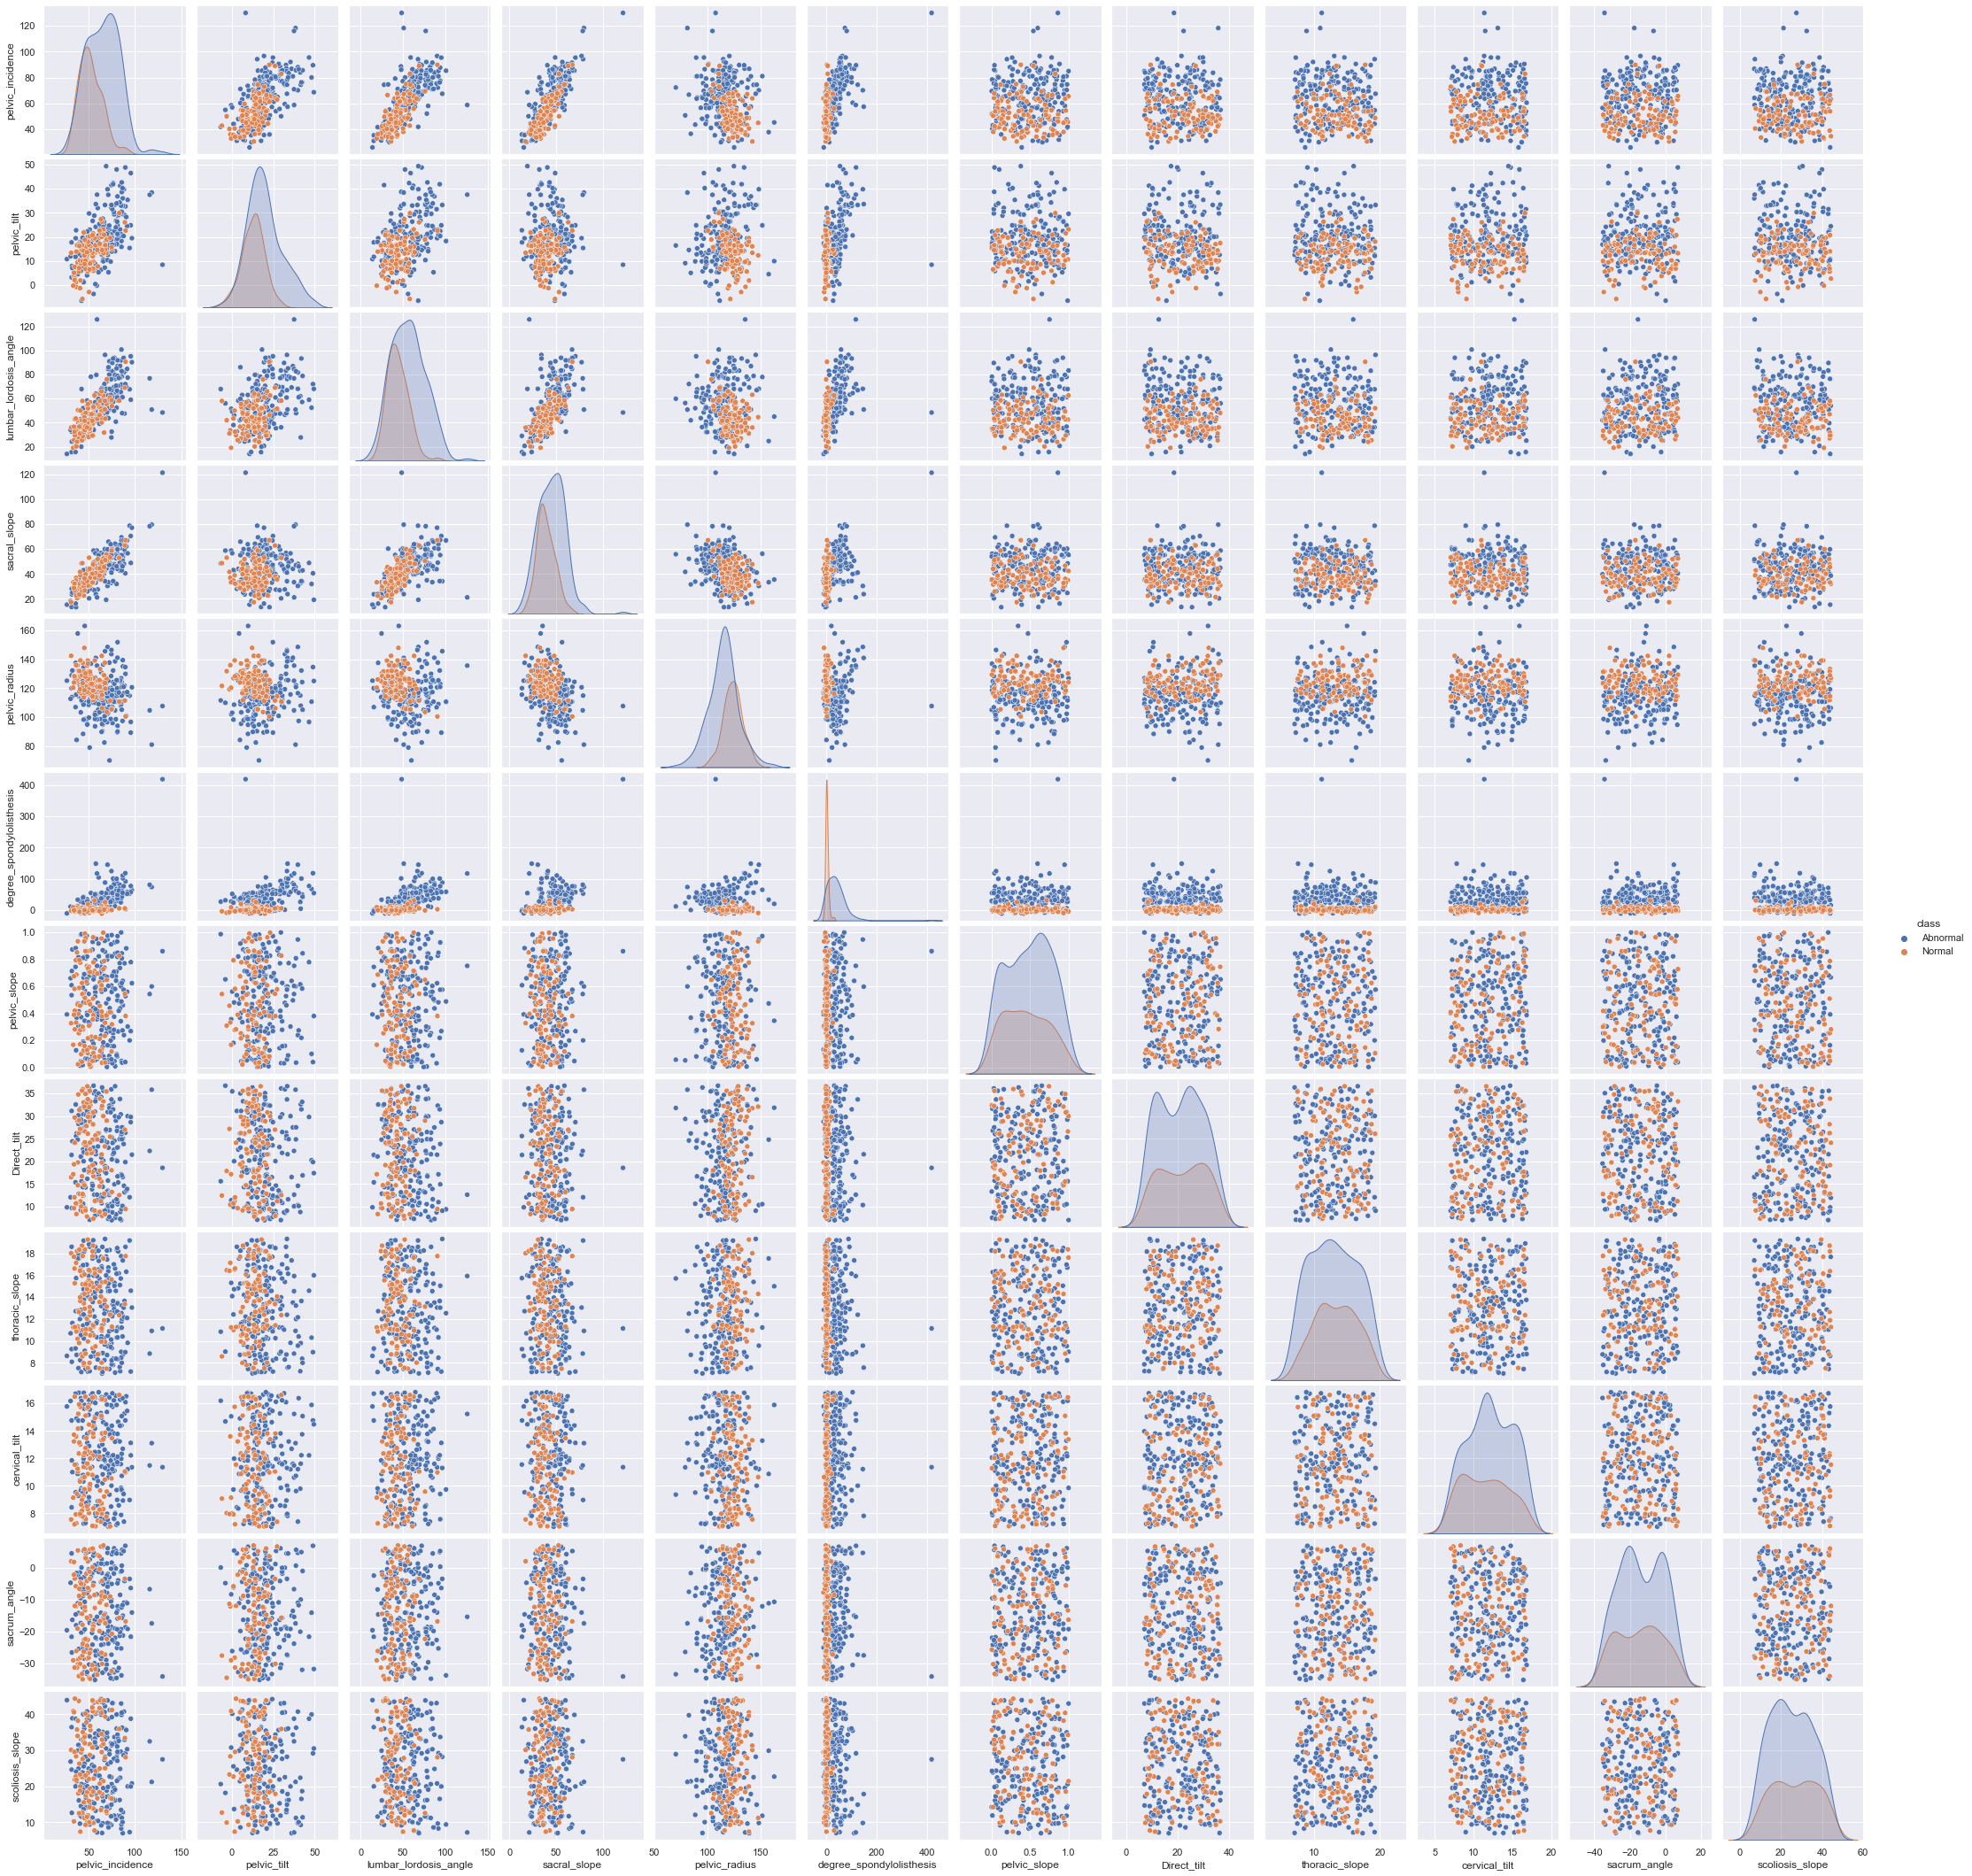

In [15]:
sns.pairplot(df, hue="class")

Parece entonces que las 6 primeras variables son las que mejor nos permitirán realizar la clasificación

In [16]:
df_sliced = df.iloc[0:,[0,1,2,3,4,5,12]]
df_sliced.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal

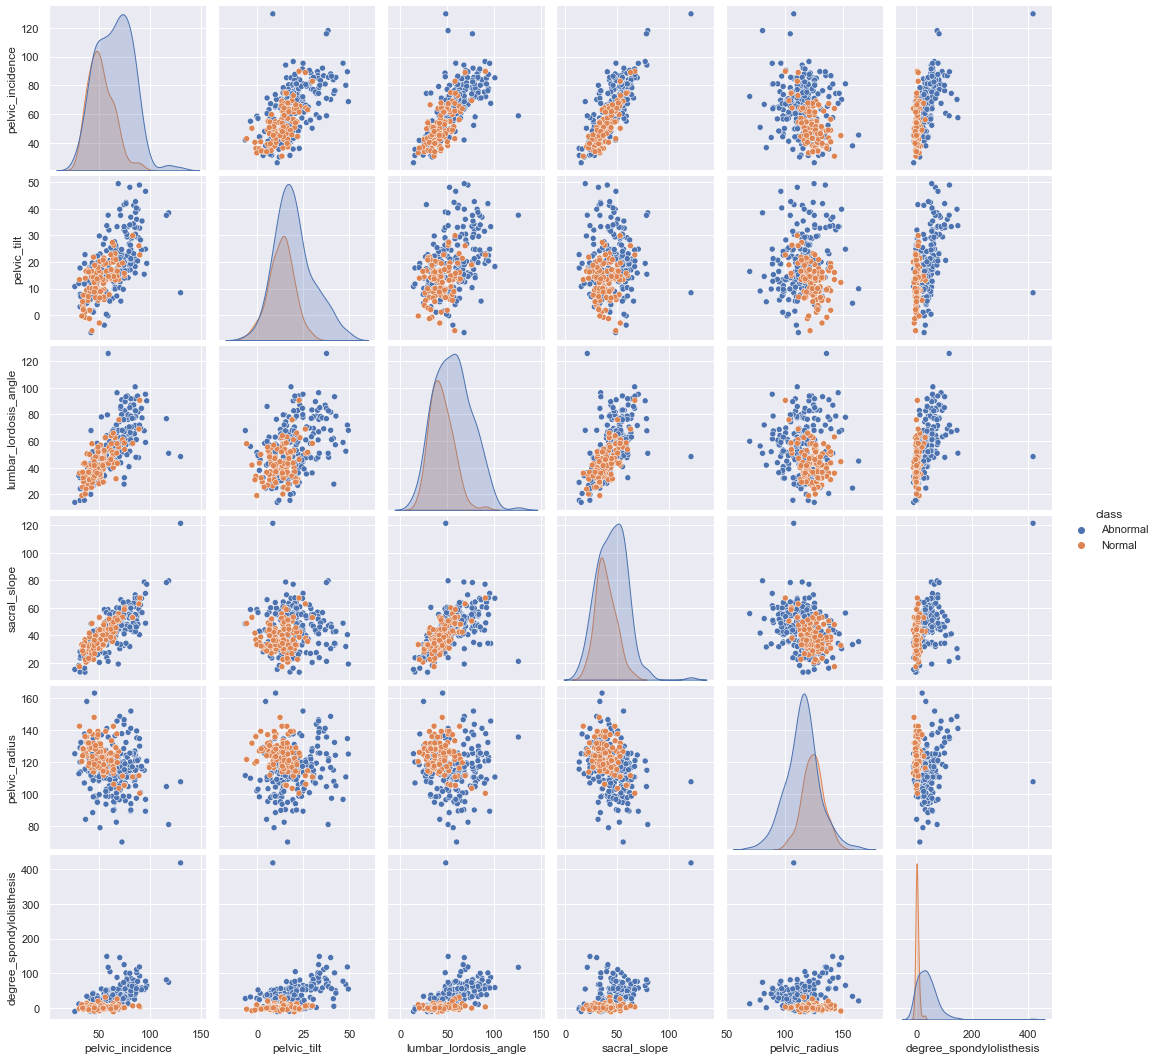

In [17]:
sns.pairplot(df_sliced, hue="class")

Como hemos dicho, parece ser que la variable degree_sponlylothesis debería ser la más prometedora a la hora de clasificar. Por tanto, nuestra conjetura es que será la primera en usar el árbol de clasificación, ya que será la que mejor separe a los individuos en las dos clases. Aún así, más adelante usaremos todas las variables para generar nuestro árbol de decisión.

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

Como vamos a usar _árboles de decisión_, no es necesario reescalar los datos

### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes. 

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [18]:
X = df.iloc[:,:-1] #Select all except the target variable
y = df.iloc[:,-1] #Select just the target variable

In [19]:
train_accuracy = []
test_accuracy = []


# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 8)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=md, min_samples_split=2, random_state=RANDOM_STATE)
    scores = cross_validate(clf, X.values, y.values, scoring='accuracy', cv=10, return_train_score=True)
    
    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))
    
train_accuracy, test_accuracy

([0.778494623655914,
  0.8179211469534049,
  0.8616487455197133,
  0.9003584229390682,
  0.9225806451612903,
  0.9476702508960575,
  0.9637992831541219],
 [0.7709677419354839,
  0.6548387096774194,
  0.7451612903225806,
  0.7451612903225807,
  0.7806451612903226,
  0.7612903225806451,
  0.7419354838709677])

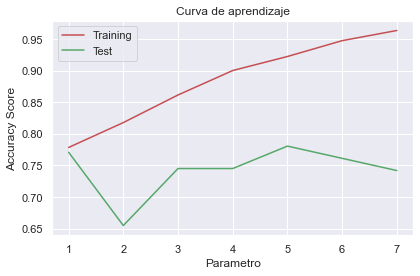

In [20]:
# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()  

Para max_depth=5 obtenemos el mejor valor de exactitud para el conjunto de entrenamiento y de test. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobre-entrenado y generaliza peor.

Podríamos hacer lo mismo con el resto de parámetros del árbol hasta encontrar los que funcionan mejor para nuestro conjunto de datos.

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles). 

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que has calculado es capaz de separar las clases? 
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


In [21]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_split=2, random_state=RANDOM_STATE)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=333)

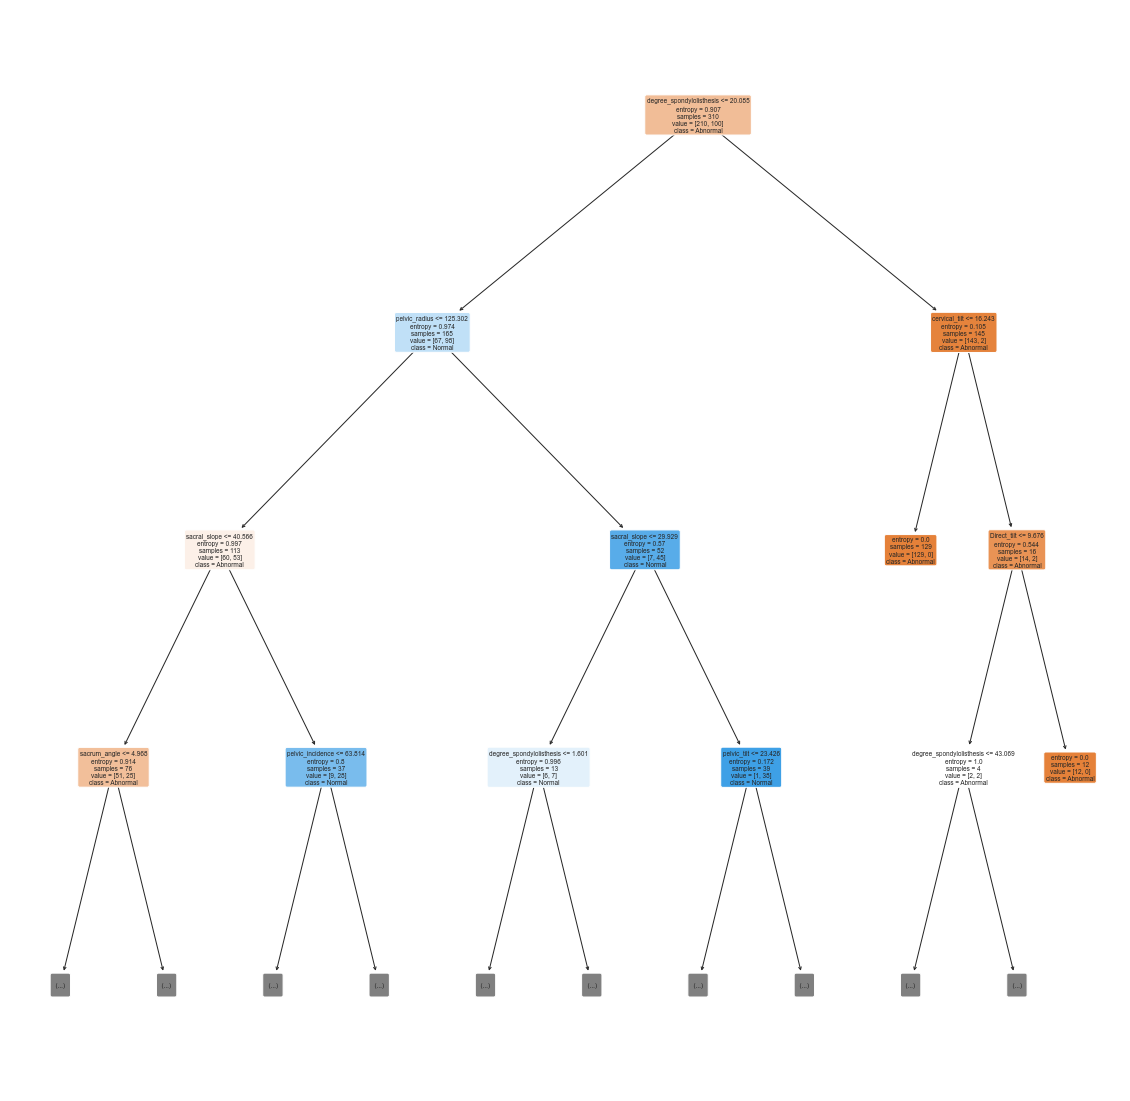

In [22]:
# Pintamos el árbol
plt.figure(figsize=(20,20))
plot_tree(dt,max_depth=3, filled=True, feature_names=X.columns, class_names=y.unique().astype('str'), rounded=True)
plt.show()

Podemos observar como nuestro árbol "optimo" tiene hojas no puras que contiene ejemplos de varias clase. En esos casos el clasificador elegirá la clase mayoritaria para hacer la predicción.

Muchas veces cuesta calibrar qué variables juegan un papel importante en el mismo. La importancia de una variable puede medirse como la agregación ponderada de las ganancias de información que ocasionó su uso en el árbol.

Veamos cómo podemos obtener y mostrar dichos valores con sklearn.

In [23]:
from matplotlib import pyplot as plt

importance = dt.feature_importances_
# summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04569
Feature: 1, Score: 0.03142
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.11052
Feature: 4, Score: 0.08638
Feature: 5, Score: 0.58796
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.02199
Feature: 8, Score: 0.02717
Feature: 9, Score: 0.03057
Feature: 10, Score: 0.04005
Feature: 11, Score: 0.01826


- ¿Cuáles son las variables más importantes y en qué orden?  
Como habíamos observado originalmente, la variable `degree_spondylolithesis` es la que mejor separa los casos `Normal` de los casos `Abnormal` por lo que era de esperar que esta fuera la primera variable utilizada en el árbol para separar los casos. Esto también se observa en que es la de mayor _importance_ en la celda anterior. Una vez usada se utilizan otras como pelvic_radius o cervical_tilt.
- ¿Hay variables del conjunto de datos que no se han usado?  
Sí, si pintamos el árbol entero (max_depth = 5), podremos observar que hay variables que no se han usado.
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?  
Con sólo una pregunta acertaría 143 ejemplos `Abnormal` mientras que fallaría 2 `Normal`. Por el lado izquierdo acertaría 98 `Normal` y fallaría 67 ejemplos que clasificaría como `Abnormal` erróneamente. Por tanto, la tasa de aciertos sería: (143 + 98) aciertos / 310 ejemplos = 0.777
- ¿El árbol que has calculado es capaz de separar las clases?  
No las separa completamente ya que en algunas hojas encontramos que hay ejemplos de ambas clases en las que seguimos teniendo una entropía alta. Por ejemplo, en la segunda hoja más a la izquierda, observamos que quedan 40 casos de una de las clases y 20 de la otra.
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?  
En el hijo derecho se separan las clases casi al completo, ya que sólamente tras el nodo raíz quedan a la derecha 143 casos `Abnormal` y sólamente dos `Normal` tras usar `degree_spondylolithesis`. Una vez conseguido esto, tras usar `cervical_tilt` hay ya 129 de los 143 casos que podemos confirmar como `Abnormal` definitivamente.
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?  
En el primer nodo, ya que encontramos una entropía aproximada de 1.0 debida a que hay un número parejo de ejemplos de cada caso.

## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [24]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, X, y, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7647575285085804
Exhaustividad ponderada media:  0.7451612903225806
F1 ponderado media:  0.7306036955780191


- ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?


Con precisión, recall y F1 aproximados de 0.75 podemos decir que el clasificador funciona bien por lo general

In [25]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X, y, cv=10)

# Informe por clases
cr = classification_report(y,predictions, target_names=y.unique().astype('str'))
print(cr)

              precision    recall  f1-score   support

    Abnormal       0.81      0.82      0.81       210
      Normal       0.61      0.59      0.60       100

    accuracy                           0.75       310
   macro avg       0.71      0.70      0.71       310
weighted avg       0.74      0.75      0.74       310



Confusion matrix, without normalization
[[173  37]
 [ 23  77]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

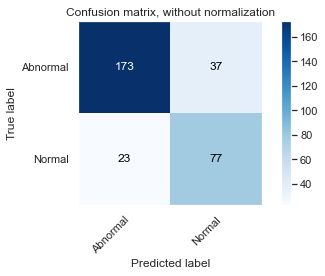

In [52]:
# El parámetro normalize permite mostrar los porcentajes en lugar del número de instancias
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y, predictions,classes=y.unique().astype('str'), normalize=False)

- ¿Cómo se comporta nuestro clasificador en cada una de las clases?  
Para la clase `Abnormal`, podemos decir que se comporta bastante bien, ya que acierta un 82% de las veces, mientras que se comporta peor para la clase `Normal`.
- Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.  

Me parece lo suficientemente fiable para poder ser utilizado en una empresa. 
Pensando, por ejemplo, en un hospital se podría utilizar este clasificador para diagnosticar los dolores de espalda de los pacientes. Si un paciente acude con dolor de espalda, es probable que algo le pase. Este algoritmo podría ayudar al doctor a comprobar si verdaderamente se trata de un lumbago y no de otro tipo de dolor como las agujetas. 
La gran ventaja del clasificador con árboles de decisión es la explicabilidad del algoritmo, ya que este permite al experto comprobar qué decisiones ha seguido el algoritmo para llegar a su conclusión y comprobar si son compatibles con el conocimiento del experto. Otras ventajas son que no hemos necesitado ningún preprocesamiento ni normalizado/escalado de los datos. 
Por otro lado, intutitivamente será muy costoso si tenemos muchas entradas de variables númericas en rangos muy grandes, lo cual nos llevará a hacer grandes particiones de los rangos. También mencionar que es fácil caer en _overfitting_ con los árboles de decisión. Añadir a esto que si el problema fuera otro tipo de problema clínico de mayor gravedad, como la detección de un cáncer, sí que le exigiría una mayor fiailidad al modelo

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

Nos va a hacer falta el escalado, ya que importa para el KNN

In [28]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [29]:
# Medias y desviaciones típicas de accuracy para distintos valores de k
accuracy_mean = []
accuracy_std = []

k_values = range(1,15)
for k in k_values: 
    # Entrenar y validar
    clf = KNeighborsClassifier(k, weights='distance')
    scores = cross_validate(clf, X_scaled, y.values, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))
    
accuracy_mean

[0.7064516129032259,
 0.7064516129032259,
 0.7161290322580645,
 0.7354838709677419,
 0.7354838709677419,
 0.7258064516129032,
 0.7129032258064516,
 0.7290322580645161,
 0.7290322580645162,
 0.7451612903225807,
 0.7387096774193549,
 0.7387096774193549,
 0.7290322580645161,
 0.7225806451612904]

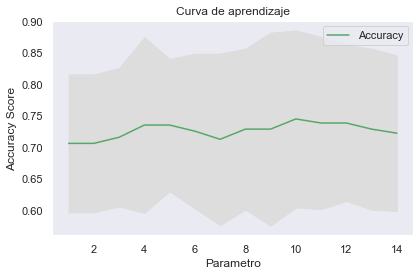

In [30]:
# Dibujamos la línea con la accuracy (exactitud) en el test
plt.plot(k_values, accuracy_mean, color="g", label="Accuracy")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(k_values, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

A la vista de los resultados, seleccionaría el valor k=10 para el número de vecinos

In [31]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import cross_validate

# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = KNeighborsClassifier(10, weights='distance')

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, X_scaled, y.values, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.0018723 , 0.00088   , 0.00081682, 0.00093913, 0.00080895,
        0.00755882, 0.00123   , 0.00232697, 0.00140905, 0.00168514]),
 'score_time': array([0.00544882, 0.01253891, 0.00687599, 0.02055907, 0.00501704,
        0.00485325, 0.0080719 , 0.00710511, 0.01136184, 0.00780892]),
 'test_precision_weighted': array([0.66482335, 0.61774194, 0.71657017, 0.91532258, 0.67741935,
        0.87131837, 0.90257413, 0.84101382, 0.7437276 , 0.84101382]),
 'test_recall_weighted': array([0.51612903, 0.5483871 , 0.61290323, 0.90322581, 0.67741935,
        0.87096774, 0.90322581, 0.83870968, 0.74193548, 0.83870968]),
 'test_f1_weighted': array([0.51612903, 0.56286187, 0.62266197, 0.89791271, 0.67741935,
        0.86673183, 0.9018044 , 0.82985452, 0.70276498, 0.82985452])}

In [32]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.7791525137633133
Exhaustividad ponderada media:  0.7451612903225807
F1 ponderado media:  0.7407995192704373


              precision    recall  f1-score   support

    Abnormal       0.82      0.80      0.81       210
      Normal       0.60      0.64      0.62       100

    accuracy                           0.75       310
   macro avg       0.71      0.72      0.71       310
weighted avg       0.75      0.75      0.75       310

Confusion matrix, without normalization
[[167  43]
 [ 36  64]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

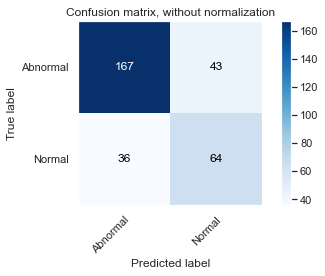

In [33]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = KNeighborsClassifier(10, weights='distance')
predictions = cross_val_predict(clf, X_scaled, y.values, cv=10)

# Informe por clases
cr = classification_report(y.values, predictions, target_names=y.unique().astype('str'))
print(cr)
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y, predictions,classes=y.unique().astype('str'), normalize=False)

El clasificador se comporta medianamente bien para ambas clases. Sin embargo, se comporta mejor para `Abnormal`

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


In [34]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [35]:
accuracy_mean = []
accuracy_std = []

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate_init=0.001, max_iter=1000, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_validate(mlp, X_scaled, y.values, scoring='accuracy', cv=10)
    
    accuracy_mean.append(np.mean(scores['test_score']))
    accuracy_std.append(np.std(scores['test_score']))

accuracy_mean

[0.7806451612903226,
 0.7774193548387097,
 0.7967741935483871,
 0.7967741935483871,
 0.8129032258064516,
 0.8096774193548386,
 0.8064516129032258,
 0.8129032258064516,
 0.8096774193548386,
 0.8096774193548386]

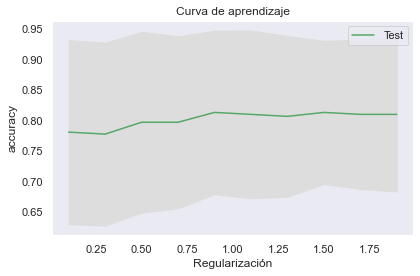

In [36]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, accuracy_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(accuracy_mean) - np.array(accuracy_std)
upper_limit = np.array(accuracy_mean) + np.array(accuracy_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Podemos obsevar un comportamiento bastante estable para este parámetro en el rango observado. 

El mejor valor (mayor accuraccy) es con $\alpha=0.9$

In [37]:
# Escribimos las métricas que queremos evaluar
# Precisión, Exhausitividad y F1 se calculan para cada clase
# Existen diferentes formas de agregar el resultado de cada clase.  
# Nosotors optamos por calcular el valor de cada clase, y hacer una media ponderada según
# la proporción de instancias de cada clase en la muestra porque la muestra está desbalanceada
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Los mejores resultados se obtenían para k=4 sobre los datos re-escalados
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.9, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)

# Calculamos las métricas sobre los datos escalados utilizando validación cruzada
# Por defecto usa "estratificación"
scores = cross_validate(clf, X_scaled, y.values, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# scores te devuelve un diccionario con varios elementos, 
# entre ellos los resultados de las métricas elegidas en el test
scores

{'fit_time': array([0.60760593, 0.7672987 , 1.19691992, 0.63452315, 0.58761597,
        0.60277772, 0.60748315, 0.5184567 , 0.52312303, 0.67296529]),
 'score_time': array([0.00376225, 0.00592923, 0.00599718, 0.00362802, 0.00362086,
        0.00342917, 0.00343394, 0.00361705, 0.003438  , 0.00358701]),
 'test_precision_weighted': array([0.66482335, 0.65627541, 0.87903226, 0.80154278, 0.90257413,
        0.87131837, 0.90257413, 0.94109397, 0.84101382, 0.94109397]),
 'test_recall_weighted': array([0.51612903, 0.61290323, 0.80645161, 0.80645161, 0.90322581,
        0.87096774, 0.90322581, 0.93548387, 0.83870968, 0.93548387]),
 'test_f1_weighted': array([0.51612903, 0.62478778, 0.81265509, 0.80009775, 0.9018044 ,
        0.86673183, 0.9018044 , 0.93336592, 0.82985452, 0.93336592])}

In [38]:
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8401342190154993
Exhaustividad ponderada media:  0.8129032258064516
F1 ponderado media:  0.8120596635046453


              precision    recall  f1-score   support

    Abnormal       0.88      0.84      0.86       210
      Normal       0.69      0.75      0.72       100

    accuracy                           0.81       310
   macro avg       0.79      0.80      0.79       310
weighted avg       0.82      0.81      0.81       310

Normalized confusion matrix
[[0.84285714 0.15714286]
 [0.25       0.75      ]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

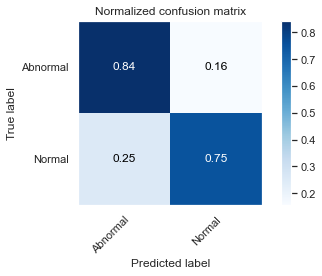

In [39]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.9, batch_size=100, 
             learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, X_scaled, y.values, cv=10)

# Informe por clases
cr = classification_report(y, predictions, target_names=y.unique().astype('str'))
print(cr)
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y, predictions,classes=y.unique().astype('str'), normalize=True)

## MÁS ALLÁ DE LA PRÁCTICA

En esta sección, ampliaremos lo anteriormente hecho. Por ejemplo, usaremos RandomizedSearchCV para encontrar los mejores parámetros para el árbol de decisión y lo validaremos usando un train-test split.

Vamos a usar GridSearchCV para optimizar otros parámetros del DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()

param_dict = {"max_depth": range(2, 10),
              "max_features": range(1, 10),
              "min_samples_leaf": range(1, 10),
              "criterion": ["gini", "entropy"],
              "random_state": [333]}

dt_cv =GridSearchCV(estimator = dt,param_grid=param_dict)
dt_cv.fit(X,y)
    
print(dt_cv.best_params_)
print(dt_cv.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 6, 'random_state': 333}
0.8129032258064516


Creamos un árbol con los parámetros óptimos obtenidos.

In [41]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=1,min_samples_leaf=6,random_state = RANDOM_STATE)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=5, max_features=1, min_samples_leaf=6,
                       random_state=333)

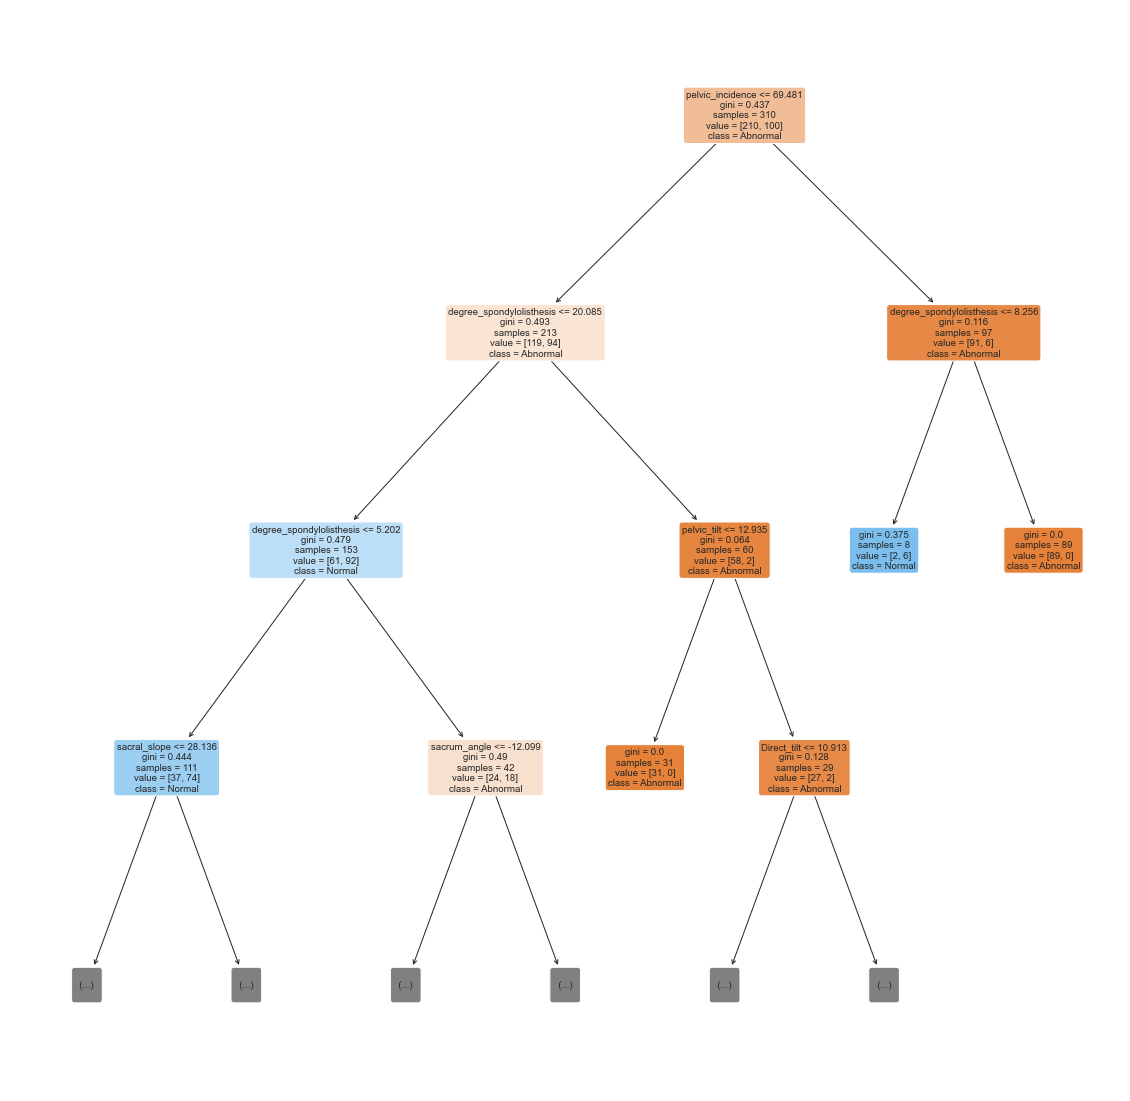

In [42]:
plt.figure(figsize=(20,20))
plot_tree(dt,max_depth=3, filled=True, feature_names=X.columns, class_names=y.unique().astype('str'), rounded=True)
plt.show()

              precision    recall  f1-score   support

    Abnormal       0.86      0.88      0.87       210
      Normal       0.73      0.69      0.71       100

    accuracy                           0.82       310
   macro avg       0.79      0.78      0.79       310
weighted avg       0.81      0.82      0.81       310

Confusion matrix, without normalization
[[184  26]
 [ 31  69]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

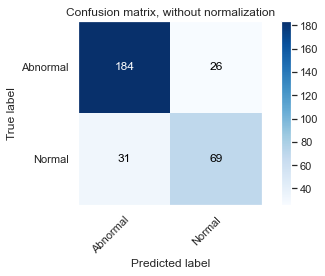

In [43]:
clf = DecisionTreeClassifier(criterion="gini",max_depth=5,max_features=1,min_samples_leaf=6,random_state = RANDOM_STATE)
predictions = cross_val_predict(clf, X, y, cv=10)

# Informe por clases
cr = classification_report(y,predictions, target_names=y.unique().astype('str'))
print(cr)
#Confusion matrix
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y,predictions,classes=y.unique().astype('str'), normalize=False)

Podemos observar una mejora en los verdaderos positivos y negativos con respecto al árbol del apartado 3

### SUPPORT VECTOR MACHINES (SVM)

Usamos Support Vector Machines en este apartado y nos quedaremos con el mejor kernel. Utilizamos un train-test split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

In [45]:
from sklearn.svm import SVC

l = []
for i in ["linear","poly","rbf"]:
    svc = SVC(kernel = i)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    
    l.append(y_pred)


print("Linear score {}".format(classification_report(y_test,l[0])))
print("Poly score {}".format(classification_report(y_test,l[1])))
print("Rbf score {}".format(classification_report(y_test,l[2])))

Linear score               precision    recall  f1-score   support

    Abnormal       0.91      0.90      0.91        69
      Normal       0.80      0.82      0.81        34

    accuracy                           0.87       103
   macro avg       0.86      0.86      0.86       103
weighted avg       0.87      0.87      0.87       103

Poly score               precision    recall  f1-score   support

    Abnormal       0.91      0.90      0.91        69
      Normal       0.80      0.82      0.81        34

    accuracy                           0.87       103
   macro avg       0.86      0.86      0.86       103
weighted avg       0.87      0.87      0.87       103

Rbf score               precision    recall  f1-score   support

    Abnormal       0.90      0.83      0.86        69
      Normal       0.70      0.82      0.76        34

    accuracy                           0.83       103
   macro avg       0.80      0.82      0.81       103
weighted avg       0.84      0.83      0

Normalized confusion matrix
[[0.89855072 0.10144928]
 [0.17647059 0.82352941]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

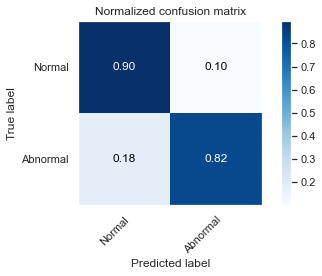

In [46]:
svc = SVC(kernel = "poly")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y_test, y_pred,classes=y_test.unique().astype('str'), normalize=True)

Sin duda, hemos obtenido los mejores resultados de todo el documento media SVM con kernel = "poly". Es un resultado que me sorprende ya que uno no esperaría una mejora tan grande al usar SVM en lugar de los usados previamente. Quizás hayamos tenido suerte al hacer el train-test split, por lo que volvemos a probar haciéndole cross-validation.

              precision    recall  f1-score   support

    Abnormal       0.88      0.82      0.85       210
      Normal       0.68      0.77      0.72       100

    accuracy                           0.81       310
   macro avg       0.78      0.80      0.79       310
weighted avg       0.82      0.81      0.81       310

Normalized confusion matrix
[[0.82380952 0.17619048]
 [0.23       0.77      ]]


<AxesSubplot:title={'center':'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

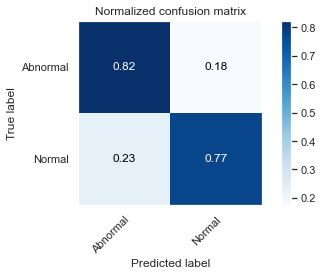

In [47]:
predictions = cross_val_predict(svc, X, y, cv=10)

# Informe por clases
cr = classification_report(y,predictions, target_names=y.unique().astype('str'))
print(cr)
#Confusion matrix
plt.rcParams["axes.grid"] = False
plot_confusion_matrix(y,predictions,classes=y.unique().astype('str'), normalize=True)

Observamos que, efectivamente, los resultados son más parecidos a los que esperábamos viendo cómo se comportaron los otros algoritmos. Si lo comparamos con el MLP, vemos que el SVM se comporta un poco peor en la clase `Abnormal` y un poco mejor en la clase `Normal`